In [1]:
# import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style 
sns.set(style="whitegrid")

In [3]:
file_path = 'data_files/WA_Fn-UseC_-HR-Employee-Attrition.csv'

# Load the dataset
df = pd.read_csv(file_path)

print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Check for any missing values
print(f"\nMissing values in any column: {df.isnull().values.any()}")



Missing values in any column: False


In [9]:
# Check for any duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [11]:
# 'EmployeeCount', 'StandardHours', and 'Over18' have the same value for all employees, so they are not useful for analysis.
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)
print("\nDropped non-informative columns.")


Dropped non-informative columns.


In [13]:
# Convert the 'Attrition' and 'OverTime' columns to numeric (0s and 1s)
df['Attrition_numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['OverTime_numeric'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

print("\nConverted 'Attrition' and 'OverTime' to numeric formats.")


Converted 'Attrition' and 'OverTime' to numeric formats.


Overall Employee Attrition Rate: 16.12%


C:\Users\New\AppData\Local\Temp\ipykernel_28388\1749370054.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='pastel')


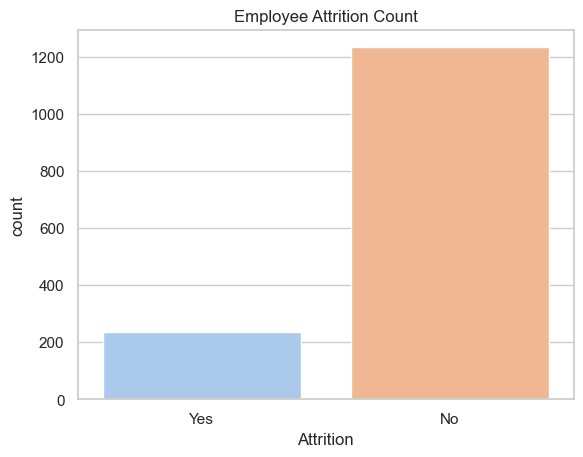

In [15]:
# Calculate and print the attrition rate
attrition_rate = df['Attrition_numeric'].mean()
print(f"Overall Employee Attrition Rate: {attrition_rate:.2%}")

# Visualize the distribution
sns.countplot(x='Attrition', data=df, palette='pastel')
plt.title('Employee Attrition Count')
plt.show()

C:\Users\New\AppData\Local\Temp\ipykernel_28388\1767367240.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', ax=ax[0], palette='viridis')


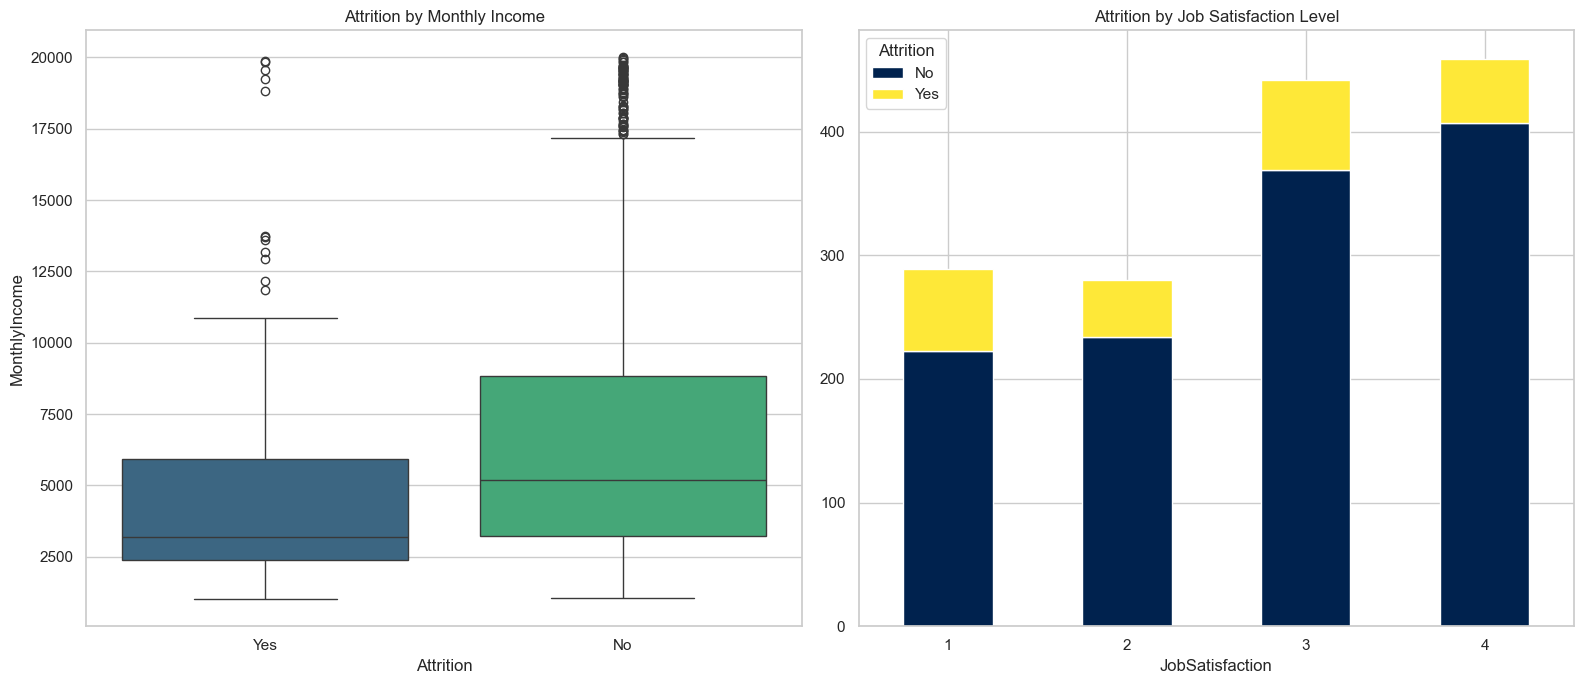

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Attrition by Monthly Income
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', ax=ax[0], palette='viridis')
ax[0].set_title('Attrition by Monthly Income')

# Attrition by Job Satisfaction
job_satisfaction_attrition = df.groupby(['JobSatisfaction', 'Attrition']).size().unstack()
job_satisfaction_attrition.plot(kind='bar', stacked=True, ax=ax[1], colormap='cividis')
ax[1].set_title('Attrition by Job Satisfaction Level')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

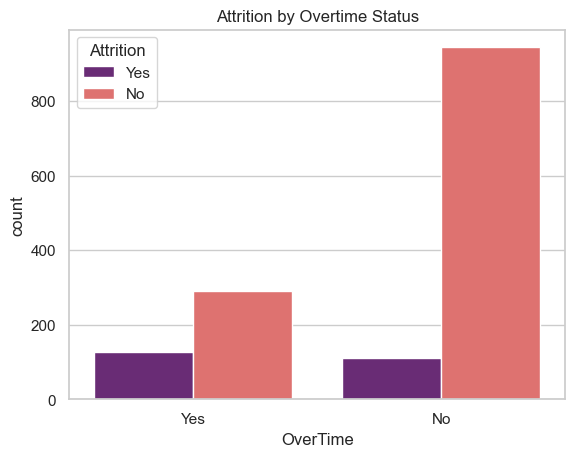

In [19]:
# Analyze attrition based on working overtime
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='magma')
plt.title('Attrition by Overtime Status')
plt.show()

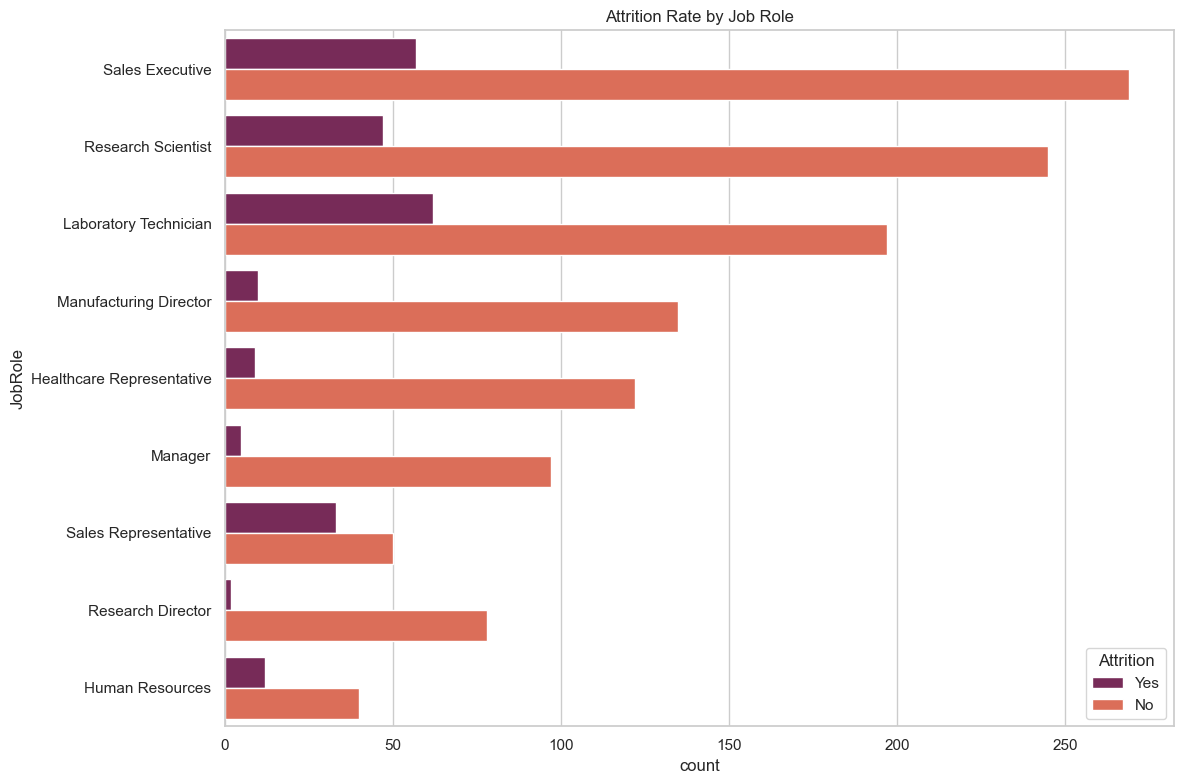

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='JobRole', hue='Attrition', palette='rocket')
plt.title('Attrition Rate by Job Role')
plt.tight_layout()
plt.show()

***The analysis of HR data showed that employee attrition was not random. The results strongly correlated attrition with two main factors: employees who worked overtime and those with low monthly income. This pointed to potential issues with burnout and compensation, giving HR a clear direction to investigate specific roles and pay scales to reduce turnover.***